# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [13]:
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [10]:
print(df.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [11]:
# Your code here
def alpha_func(D, idx):
    alpha = D.loc[idx, 'Sepal.Width'] / D.loc[idx, 'Sepal.Length']
    return alpha

Test the code below

In [12]:
alpha_func(df, range(100))

0     0.686275
1     0.612245
2     0.680851
3     0.673913
4     0.720000
        ...   
95    0.526316
96    0.508772
97    0.467742
98    0.490196
99    0.491228
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [33]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    0.566667
63    0.475410
51    0.500000
26    0.680000
30    0.645833
        ...   
62    0.366667
4     0.720000
8     0.659091
37    0.734694
83    0.450000
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [181]:
# Add your code here to set the seed
# _(iii)_ The mean of Sepal.Length will ahow the central tendency of the data 
# and it will not show the variability or the error of that estimation. 
# On the other hand, bootstrapping will provide more comprehensive picture of the uncertainty of the mean estimation.


# _(iv)_ 

def boot_SE(data, n_bootstrap=1000, seed=13):
    rng = np.random.default_rng(seed)
    bootstrap_means = []

    for _ in range(n_bootstrap):
        bootstrap_sample = rng.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    bootstrap_se = np.std(bootstrap_means, ddof=1)

    return bootstrap_se

sepal_length_data = df['Sepal.Length'].values
boot_SE(sepal_length_data, n_bootstrap=1000, seed=13)

0.0703228292336318

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [182]:
# Your code here

bootstrap_se = boot_SE(sepal_length_data, n_bootstrap=1000)

print(bootstrap_se)

0.0703228292336318


_(vi)_ What is the original mean value of `Sepal.Length`?

In [139]:
# Your code here
mean_sepal_length = df['Sepal.Length'].mean()

print(f"The original mean value of Sepal.Length is: {mean_sepal_length}")

The original mean value of Sepal.Length is: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [189]:
# Add your code here

def bootstrap_samples(data, n_bootstrap, seed=0):
    rng = np.random.default_rng(seed)
    bootstrap_means = []

    for _ in range(n_bootstrap):
        bootstrap_sample = rng.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    bootstrap_means = np.array(bootstrap_means)
    boot_mean = np.mean(bootstrap_means)
    boot_std = np.std(bootstrap_means, ddof=1)

    return bootstrap_means, boot_mean, boot_std

# Create bootstrapped samples of Sepal.Length
boot_se_samples, boot_mean, boot_std = bootstrap_samples(sepal_length_data, n_bootstrap=1000, seed=13)

# Compare the bootstrapped mean against the original mean
mean_sepal_length = df['Sepal.Length'].mean()

print(f"The original mean value of Sepal.Length is: {mean_sepal_length}")
print(f"The bootstrapped mean value of Sepal.Length is: {boot_mean}")
print(f"The bootstrapped standard deviation of Sepal.Length is: {boot_std}")

# Calculate the bootstrapped range
t_range = np.ptp(boot_se_samples)

print(f"The range of the bootstrapped samples is: {t_range}")

The original mean value of Sepal.Length is: 5.843333333333334
The bootstrapped mean value of Sepal.Length is: 5.842043333333333
The bootstrapped standard deviation of Sepal.Length is: 0.0703228292336318
The range of the bootstrapped samples is: 0.4460000000000006


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [188]:
# Add your code here

conf_interval = np.percentile(boot_se_samples, [2.5, 97.5])
print(f"The 95% confidence interval for the mean value of Sepal.Length is: {conf_interval}")

The 95% confidence interval for the mean value of Sepal.Length is: [5.70061667 5.98001667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

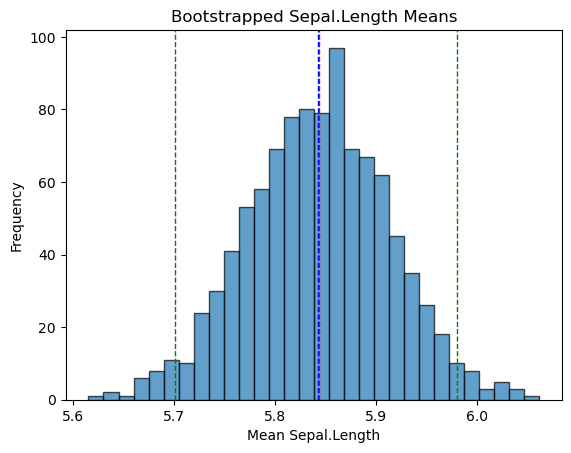

In [190]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_se_samples, bins=30, edgecolor='k', alpha=0.7)
ax.axvline(mean_sepal_length, color='r', linestyle='dashed', linewidth=1, label='Original Mean')
ax.axvline(boot_mean, color='b', linestyle='dashed', linewidth=1, label='Bootstrapped Mean')
ax.axvline(conf_interval[0], color='g', linestyle='dashed', linewidth=1, label='95% CI Lower')
ax.axvline(conf_interval[1], color='g', linestyle='dashed', linewidth=1, label='95% CI Upper')

# Add a title
#Add your code here
ax.set_title('Bootstrapped Sepal.Length Means')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Mean Sepal.Length')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [191]:
# Write your answer here

# In conclusion, the shipping company should plan for an average Sepal.Length of around 5.84 units 
# but should ensure that there is enough flexibility to accommodate lengths up to approximately 5.99 units. 

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
